<a href="https://colab.research.google.com/github/jhcheng/DTSA5510/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import clone

# Load the Dataset

https://www.openml.org/search?type=data&sort=runs&id=43618&status=active

In [63]:
dataset = fetch_openml(data_id=43618, parser='auto')
dataset.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [64]:
n_features = len(dataset.feature_names)

# EDA

In [65]:
X = dataset.frame

In [66]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Impute Missing Values

In [67]:
X.loc[X['MINIMUM_PAYMENTS'].isna(), 'MINIMUM_PAYMENTS'] = X['MINIMUM_PAYMENTS'].min()

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [69]:
X.loc[X['CREDIT_LIMIT'].isna(), 'CREDIT_LIMIT'] = X['CREDIT_LIMIT'].mean()

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

# Preprocessing the Dataset

## Standardize

In [71]:
X = StandardScaler().fit_transform(X)

In [72]:
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.29731002,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204215,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848964,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175131,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316585,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923807,
        -0.52555097, -4.12276757]])

## Dimension Reduction Using PCA

In [73]:
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

In [74]:
df_pca = pd.DataFrame({
    "principal_component": range(1, X.shape[1]+1),
    "explained_variance": pca.explained_variance_ratio_,
    "cumsum_explained_variance": pca.explained_variance_ratio_.cumsum(),
})
df_pca.loc[-1] = 0
df_pca.sort_values(by="principal_component", inplace=True)

In [75]:
df_pca

,principal_component,explained_variance,cumsum_explained_variance
-1,0,0.000000e+00,0.000000
0,1,2.730156e-01,0.273016
1,2,2.031970e-01,0.476213
2,3,8.825578e-02,0.564468
3,4,7.478852e-02,0.639257
4,5,6.204376e-02,0.701301
5,6,5.732915e-02,0.758630
6,7,4.882105e-02,0.807451
7,8,4.324435e-02,0.850695
8,9,3.779559e-02,0.888491


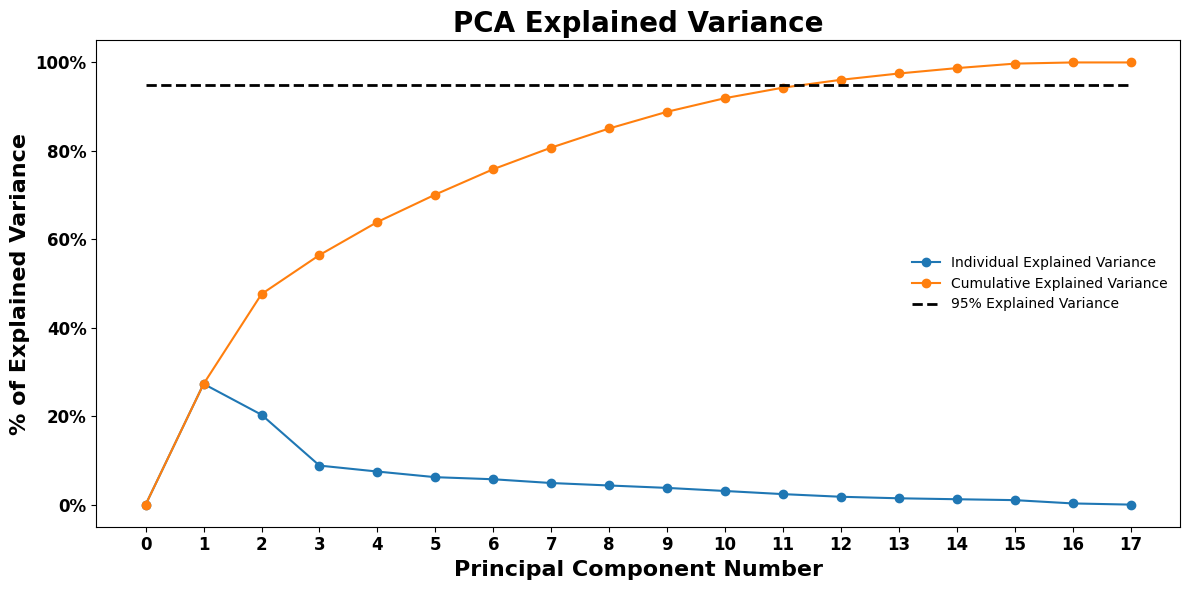

In [76]:
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_pca["principal_component"], df_pca["explained_variance"], marker="o", label="Individual Explained Variance")
plt.plot(df_pca["principal_component"], df_pca["cumsum_explained_variance"], marker="o", label="Cumulative Explained Variance")
plt.plot(df_pca["principal_component"], [0.95] * len(df_pca), color="black", linewidth=2, linestyle="--", label="95% Explained Variance")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title("PCA Explained Variance", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.xticks(range(0, n_features+1), range(0, n_features+1), fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("Principal Component Number", fontsize=16, fontweight="bold")
plt.ylabel("% of Explained Variance", fontsize=16, fontweight="bold")
plt.grid(False)
plt.legend(loc="best", frameon=False)
plt.tight_layout()
plt.show()

In [77]:
n_components_pca = int(df_pca["cumsum_explained_variance"].gt(0.95).idxmax())
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 11


In [78]:
pca_95 = PCA(n_components=n_components_pca, random_state=42)
X = pca_95.fit_transform(X)

# Build and Traing Models

https://scikit-learn.org/stable/modules/clustering.html#clustering

## Train KMeans Models with Different Parameters

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [80]:
no_of_clusters = range(2, 21)

In [81]:
def train_model(base_model, no_of_clusters):
  silhouette_scores = []
  models = []
  for cluster in no_of_clusters:
    model = clone(base_model)
    model = model.set_params(**{'n_clusters': cluster})
    model = model.fit(X)
    silhouette_avg = silhouette_score(X, model.labels_)
    silhouette_scores.append(silhouette_avg)
    models.append(model)
  return silhouette_scores, models

In [82]:
silhouette_scores, kmeans_models = train_model(KMeans(random_state=42, n_init='auto'), no_of_clusters)

In [83]:
def plot_score(no_of_clusters, silhouette_scores):
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xticks(range(1, len(no_of_clusters)+1), no_of_clusters, fontsize=12, fontweight="bold")
  ax.plot(range(1, len(no_of_clusters)+1), silhouette_scores, marker="o")
  ax.tick_params(axis='y')

  plt.yticks(fontsize=12, fontweight="bold")
  plt.xlabel("# of Clusters", fontsize=16, fontweight="bold")
  plt.ylabel("Silhouette", fontsize=16, fontweight="bold")

  plt.title("Silhouette Scree Plot per Cluster", fontsize=20, fontweight="bold")
  ax.title.set_position([.5, 1.025])
  plt.grid(False)
  plt.tight_layout()
  plt.show()


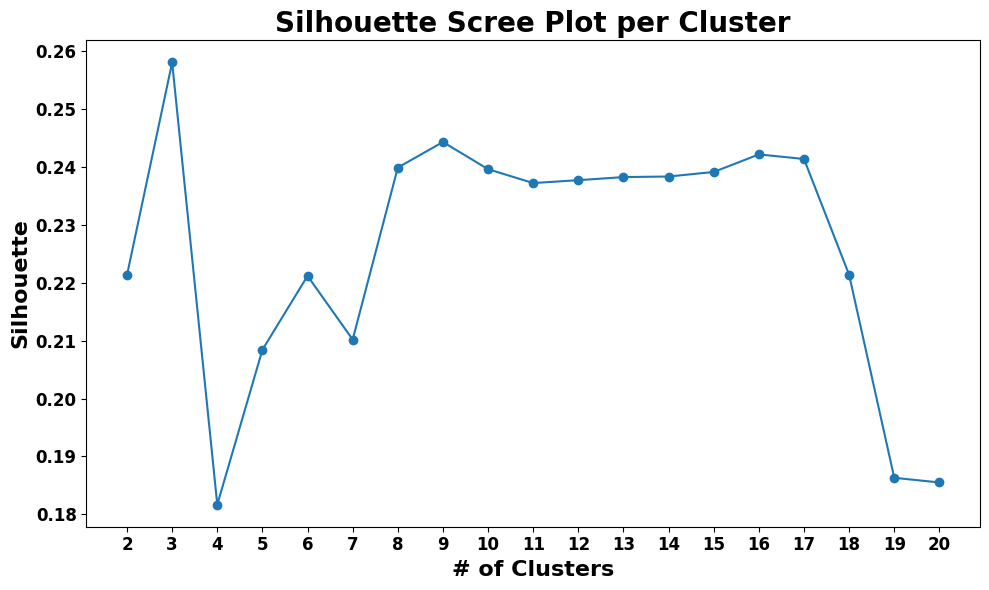

In [84]:
plot_score(no_of_clusters, silhouette_scores)

## Evaluate the Models

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [85]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_silhouette_analysis(models, silhouette_scores):
  for k in range(0, len(models)):
      clusterer = models[k]
      cluster_labels = clusterer.labels_
      n_clusters = len(np.unique(cluster_labels))

      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_scores[k]
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.22135045391728062
For n_clusters = 3 The average silhouette_score is : 0.258045139577939
For n_clusters = 4 The average silhouette_score is : 0.18168256749555844
For n_clusters = 5 The average silhouette_score is : 0.20842302933194717
For n_clusters = 6 The average silhouette_score is : 0.22117893932316224
For n_clusters = 7 The average silhouette_score is : 0.21018621865513618
For n_clusters = 8 The average silhouette_score is : 0.2398831075403393
For n_clusters = 9 The average silhouette_score is : 0.2443069297247471
For n_clusters = 10 The average silhouette_score is : 0.23960857791117265
For n_clusters = 11 The average silhouette_score is : 0.23721339118725912


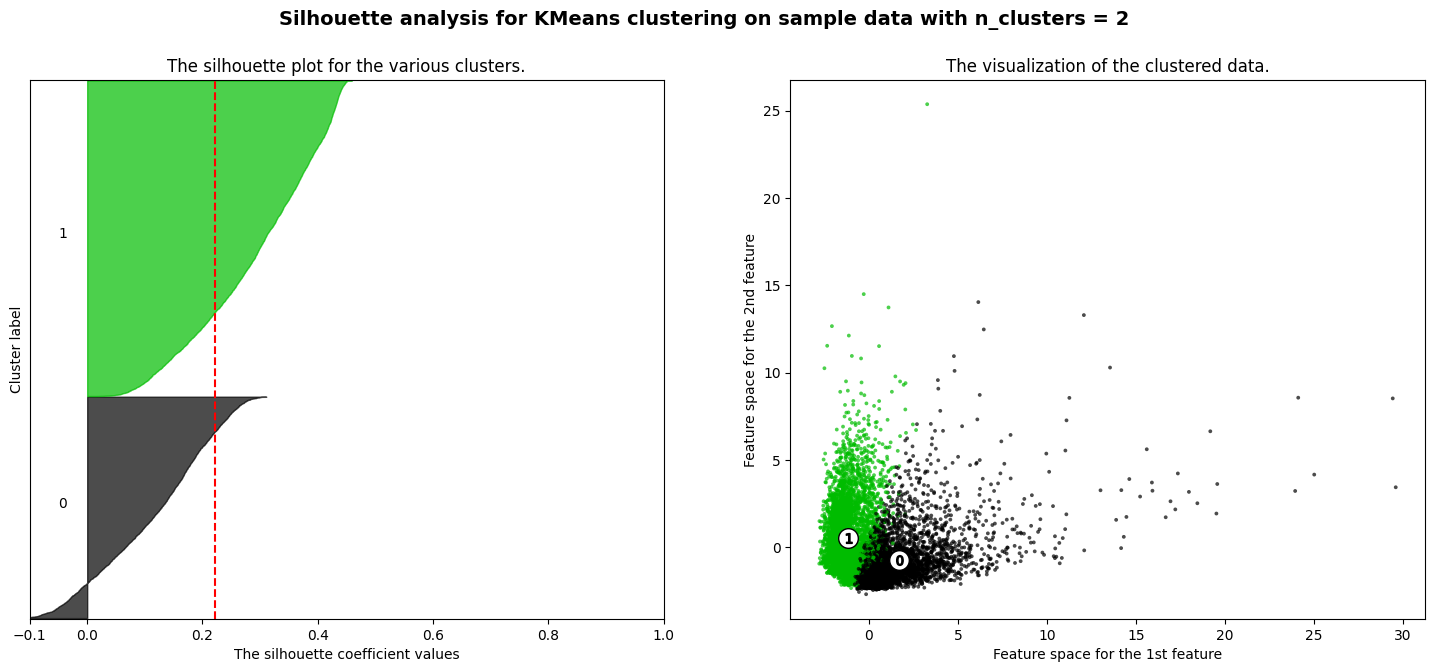

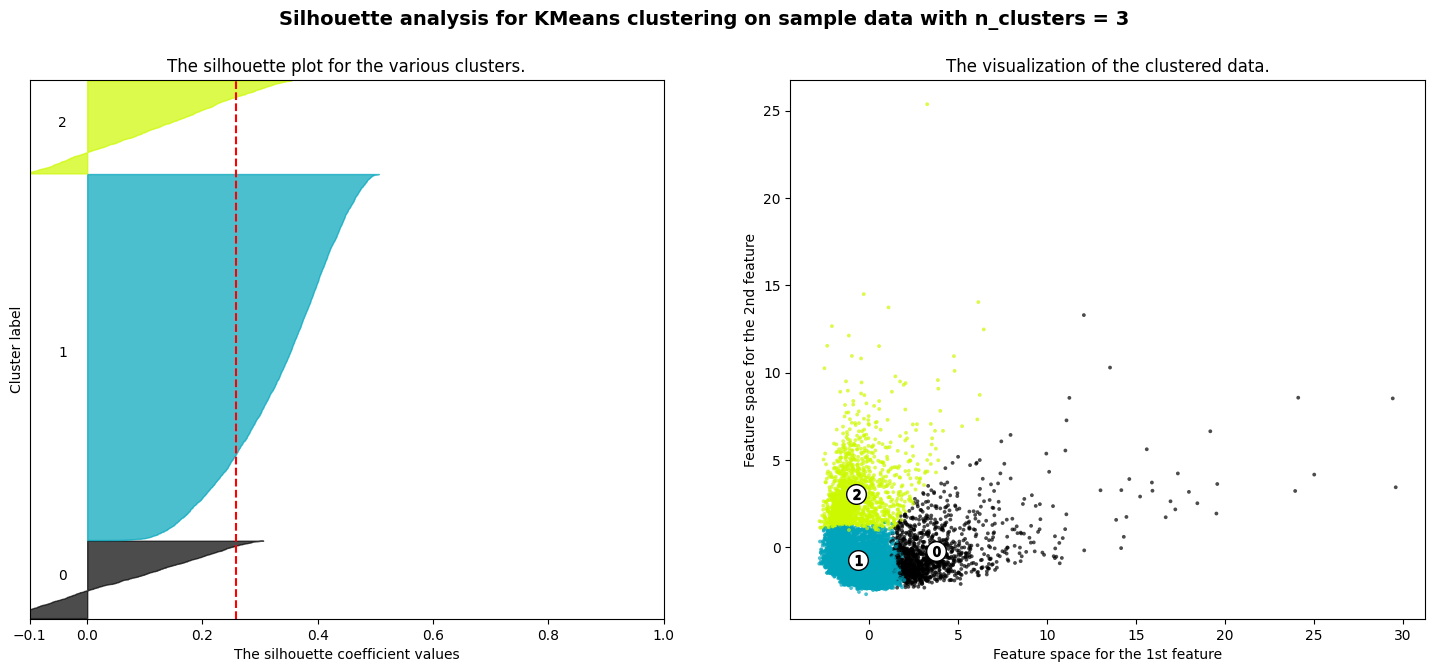

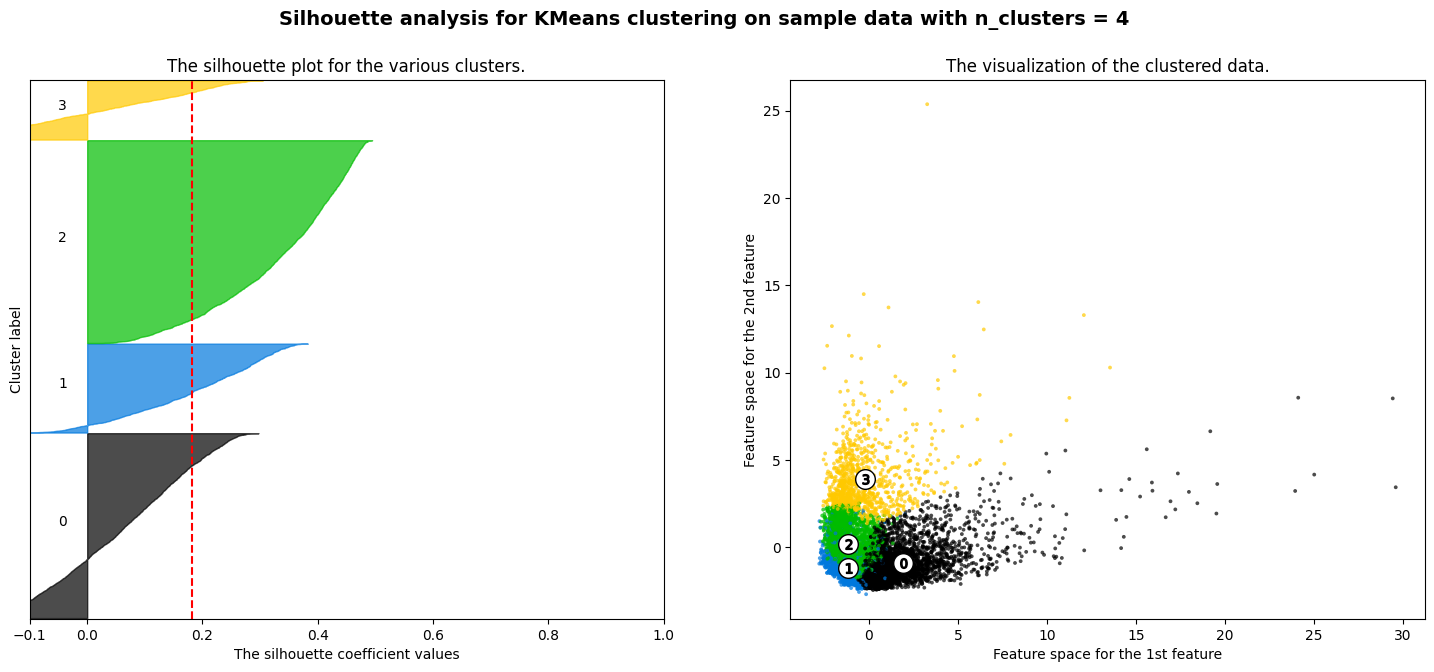

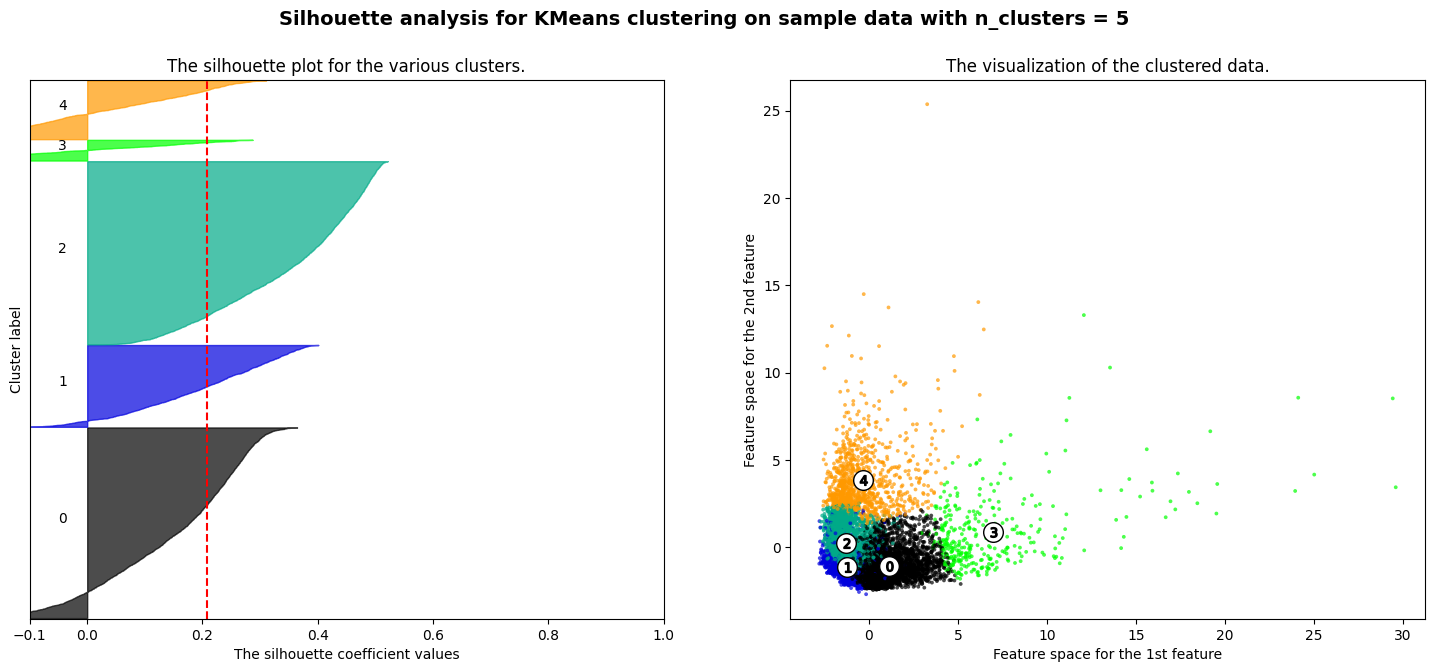

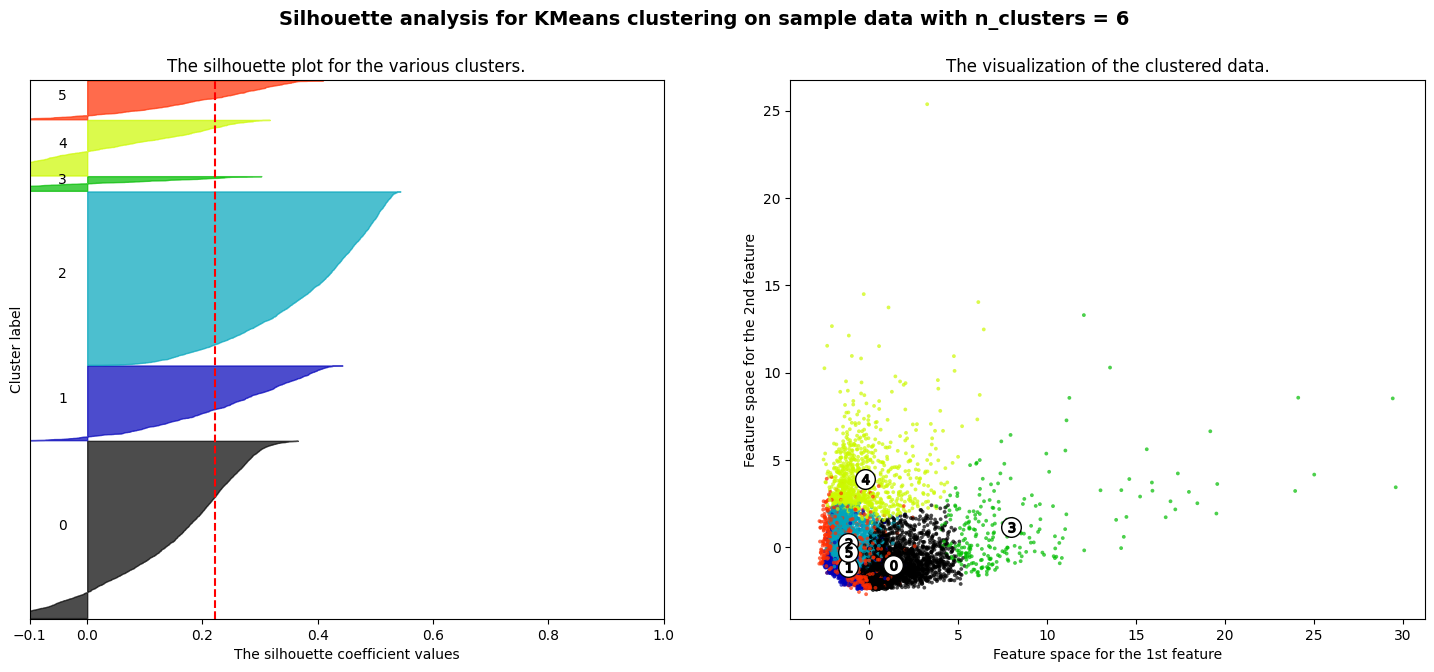

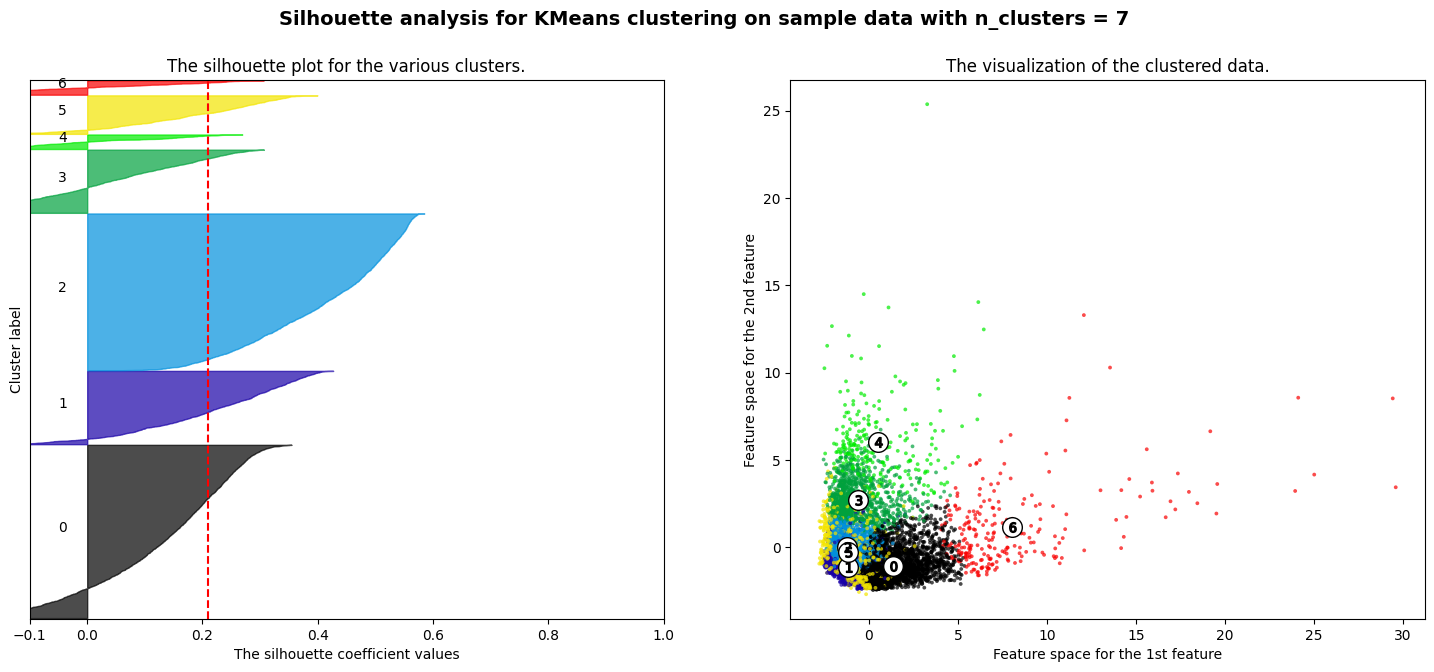

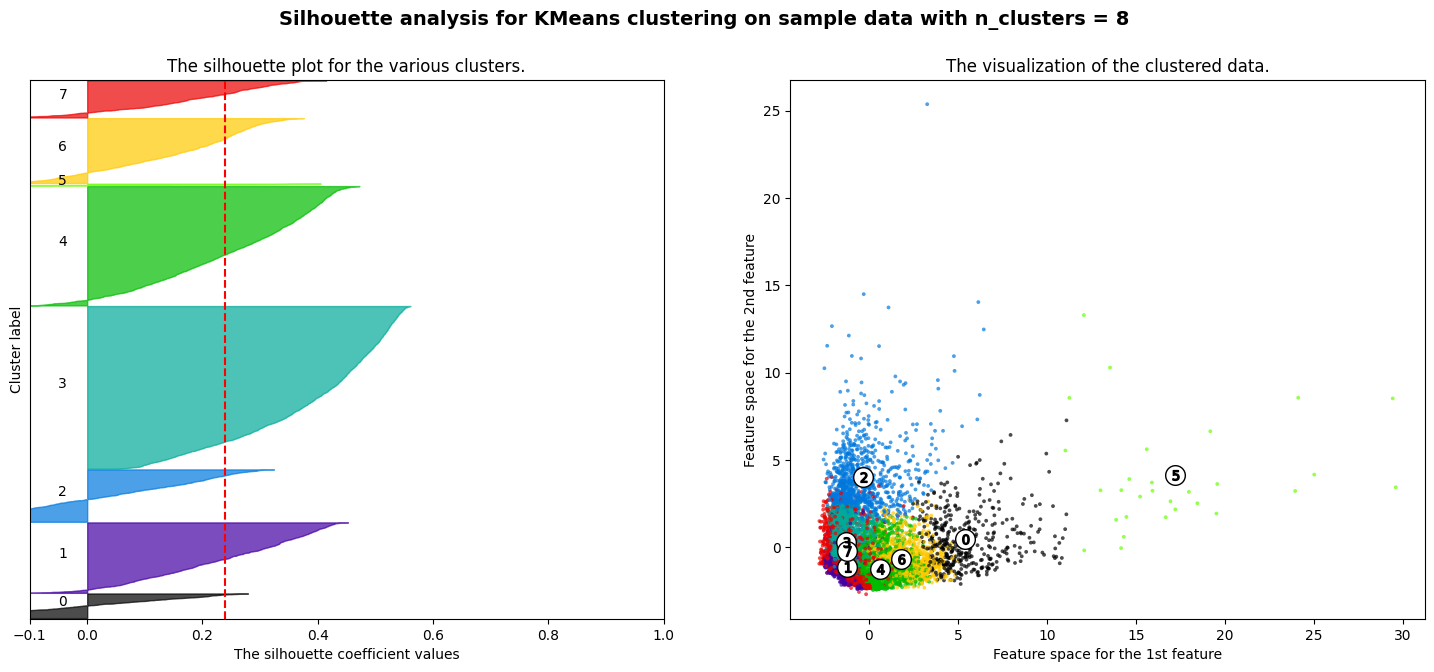

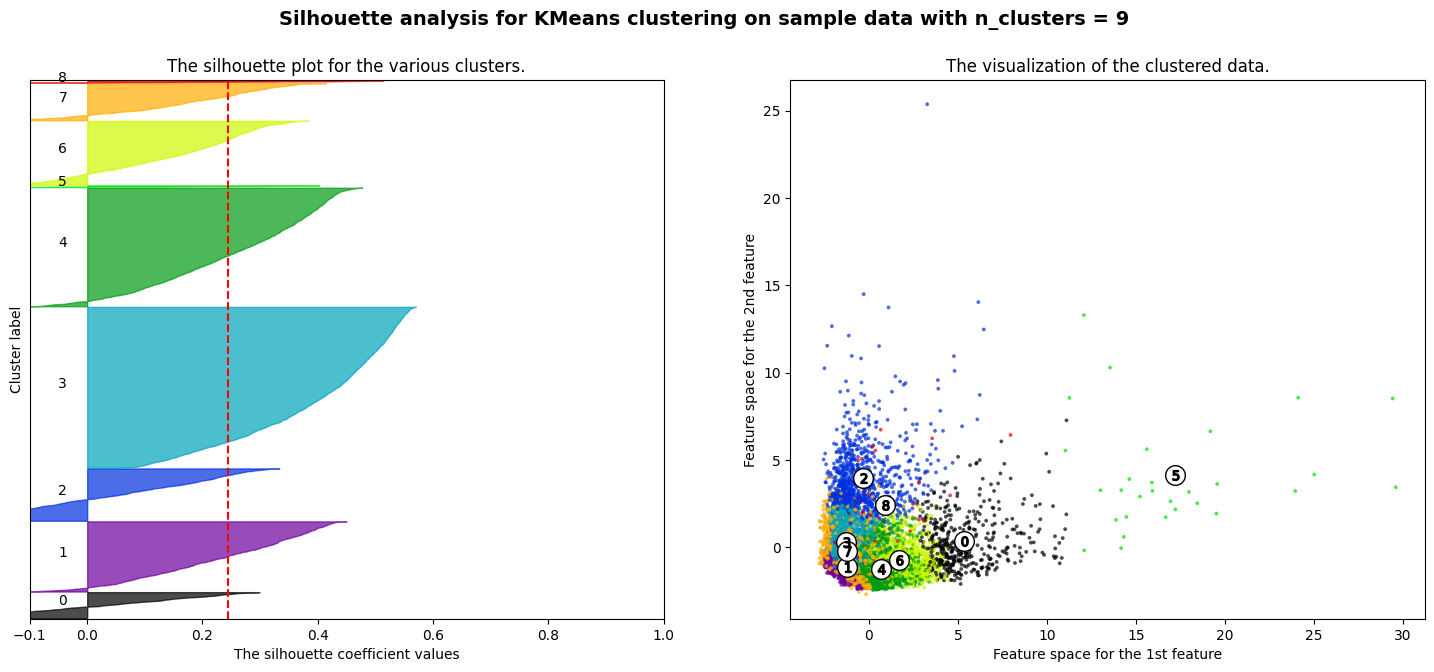

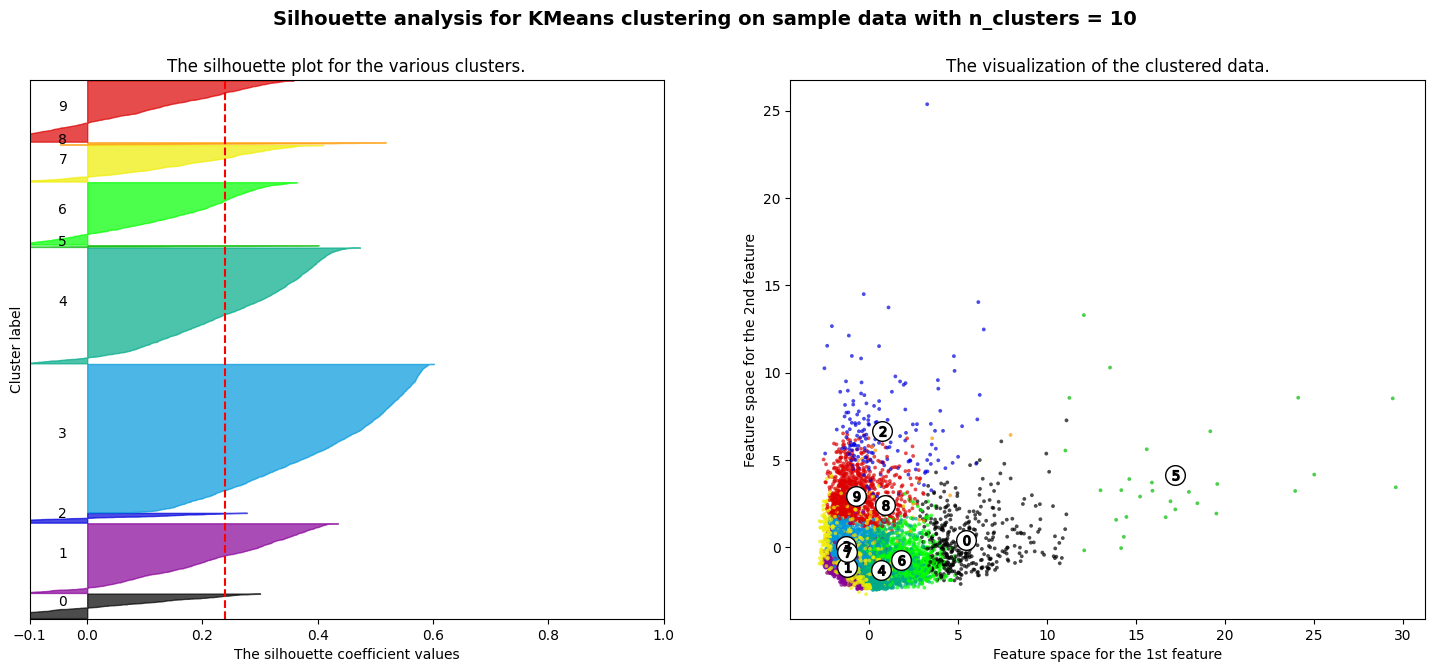

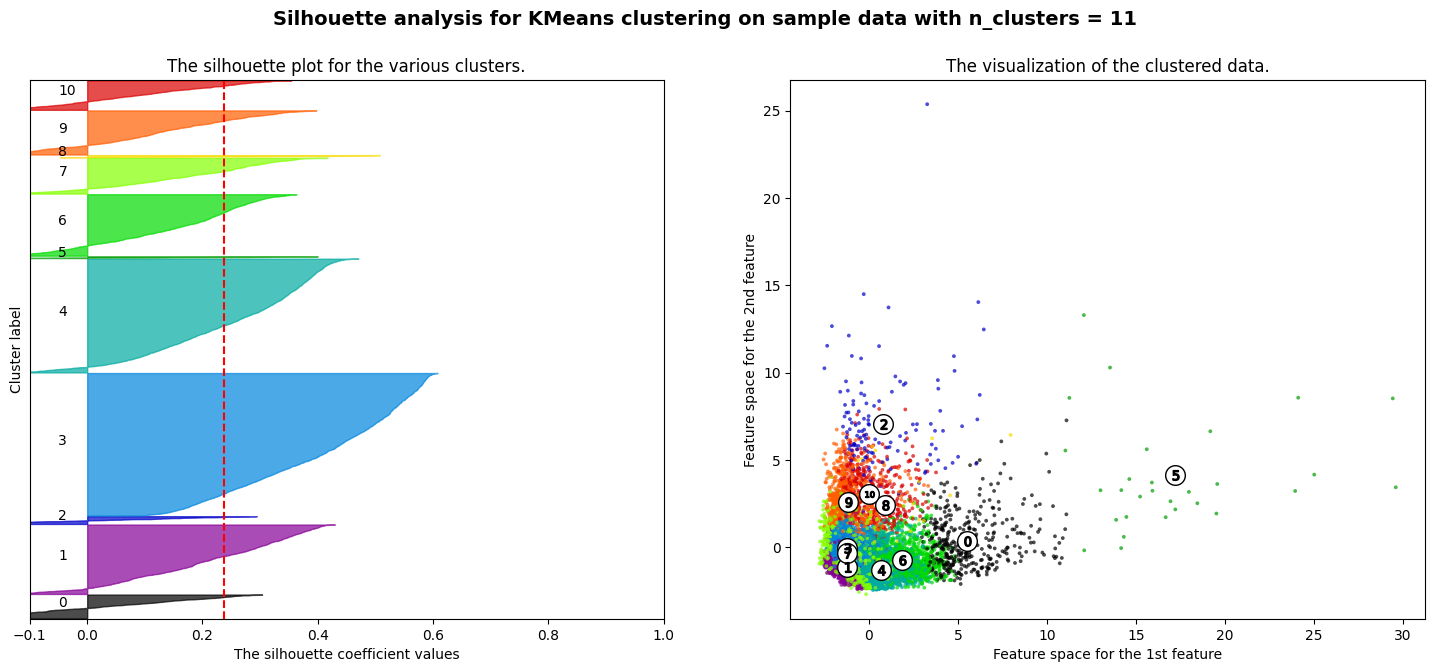

In [86]:
plot_silhouette_analysis(kmeans_models[:10], silhouette_scores)

## Try Other Algorithm - AgglomerativeClustering


In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster

for n in range(2, 10):
  agglo = cluster.FeatureAgglomeration(n_clusters=n)
  agglo.fit(X)
  X_reduced = agglo.transform(X)

  agg = AgglomerativeClustering(n_clusters=n)
  agg.fit(X_reduced)
  print("For n_clusters =",
          n,
          "The average silhouette_score is :",
          silhouette_score(X, agg.labels_),
  )

For n_clusters = 2 The average silhouette_score is : 0.4310118745709263
For n_clusters = 3 The average silhouette_score is : 0.19606124683720855
For n_clusters = 4 The average silhouette_score is : 0.16577784926702405
For n_clusters = 5 The average silhouette_score is : 0.16765746222242192
For n_clusters = 6 The average silhouette_score is : 0.17411920126789937
For n_clusters = 7 The average silhouette_score is : 0.18145168589739014
For n_clusters = 8 The average silhouette_score is : 0.16374181407029603
For n_clusters = 9 The average silhouette_score is : 0.1846823264980311


# Summary and Discussion




*  Based on the **Kmeans** algorithm, we try to build the model with different n_cluster values, and use **Silhouette Coefficient** as the basis for evaluating the model.
*  For a dense dataset, dividing too many clusters will result in some clusters having only a few data points, which may not make any sense in the real world. Using our data as an example, *n_cluster=3* gets the highest score. And from the analysis plot, it is also more meaningful.
*  Different algorithms may result in different results. For example, when we switch to **AgglomerativeClustering**, we get the highest score at *n_cluster=2* and this score is even higher than Kmeans at n_cluster=3.

